# heatmap

In [4]:
import pandas as pd
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()


In [93]:
# terminal conda install xlrd
# conda install openpyxl
food= pd.read_excel("c:/R_project/Team_Complete/data/sns1819.xlsx")
del food['date']
food.head()

,가공란,가자미,갈치,감/홍시,감귤/한라봉/오렌지,감말랭이,감자,건과일,건어물,게장류,...,포도/거봉/체리,표고버섯,한방,해조류/해초류,헛개/가시오가피,호박,혼합곡,홍삼,홍차,회
0,0.480964,5.833943,29.364923,365.488613,136.783670,2.862813,155.474491,5.564747,85.348177,39.643449,...,75.815972,13.376533,2.372878,54.869084,1.689494,47.426342,0.098046,7.668133,24.731924,270.189197
1,1.168411,8.385820,39.394427,376.263330,161.252120,4.328310,187.012187,8.286172,102.562129,40.083789,...,88.819697,20.536292,2.160430,61.247191,2.583774,55.012706,0.000000,14.625319,29.378057,294.045213
2,1.809684,10.555277,42.107944,382.404570,175.834060,5.545913,198.857517,7.800769,106.380595,38.410046,...,92.440125,18.640829,3.313969,65.417395,2.465728,69.576386,0.075166,13.839030,35.035700,295.568217
3,1.058606,12.273916,42.188490,429.824530,176.727450,5.867105,201.311370,8.750575,107.384313,36.799861,...,91.890648,16.847799,3.178921,66.916329,2.799314,66.378009,0.331991,21.091716,34.889480,269.719950
4,1.302522,9.342941,43.391387,394.474523,197.272497,4.414783,192.594032,8.629887,108.831772,41.767793,...,93.600275,18.415490,4.168146,71.264314,4.097632,66.215899,0.156705,18.763720,35.349955,279.632967


In [126]:
# 스케일링
from sklearn.preprocessing import StandardScaler
# food_std = pd.DataFrame(StandardScaler().fit_transform(food.iloc[:,:-1]) )
food_std = StandardScaler().fit_transform(food.iloc[:,:]) 
food_std_df = pd.DataFrame( food_std, columns = food.columns) 
food_std_df.head()

,가공란,가자미,갈치,감/홍시,감귤/한라봉/오렌지,감말랭이,감자,건과일,건어물,게장류,...,포도/거봉/체리,표고버섯,한방,해조류/해초류,헛개/가시오가피,호박,혼합곡,홍삼,홍차,회
0,-2.583363,-2.788641,-1.451444,-1.020980,-2.050774,0.343726,-1.556410,-1.602416,-2.025119,-0.530296,...,-1.939050,-1.715280,-0.760815,-1.437111,-2.055565,-1.168468,-0.348716,-1.336764,-0.087861,0.238226
1,-1.810426,-1.340921,-0.550055,-0.707567,-1.104038,1.060210,-0.749492,0.445084,-0.478499,-0.499581,...,-1.488144,0.477393,-0.780968,-0.743271,-1.117623,-0.893504,-0.929581,-0.919299,0.472658,1.012054
2,-1.089406,-0.110154,-0.306182,-0.528932,-0.539831,1.655498,-0.446420,0.079884,-0.135421,-0.616329,...,-1.362606,-0.103092,-0.671542,-0.289617,-1.241433,-0.365650,-0.484267,-0.966480,1.155207,1.061456
3,-1.933887,0.864857,-0.298943,0.850413,-0.505264,1.812529,-0.383636,0.794483,-0.045240,-0.728645,...,-1.381659,-0.652206,-0.684353,-0.126556,-0.891560,-0.481574,1.037270,-0.531283,1.137567,0.223004
4,-1.659638,-0.797931,-0.190834,-0.177843,0.289668,1.102487,-0.606676,0.703682,0.084809,-0.382116,...,-1.322377,-0.172102,-0.590513,0.346438,0.470146,-0.487449,-0.001196,-0.670975,1.193119,0.544557


In [102]:
weather = pd.read_excel("c:/R_project/Team_Complete/data/weather1819.xlsx")
del weather['date']
weather.head()

,평균기온,최저기온,최고기온,일강수량,평균이슬점온도,최소상대습도,평균상대습도,합계일조시간,합계일사량,평균지면온도,합계대형증발량,합계소형증발량
0,-1.3,-5.1,3.8,0.0,-13.9,19,39.1,8.3,6.14,-1.7,1.1,1.6
1,-1.8,-4.3,1.8,0.0,-14.1,19,42.0,7.9,5.36,-2.3,1.3,1.9
2,-4.7,-7.1,-0.4,0.0,-15.8,28,42.3,8.6,6.56,-3.4,1.0,1.5
3,-4.7,-8.7,-0.7,0.0,-15.6,31,43.0,6.2,4.73,-3.3,0.8,1.1
4,-3.0,-5.6,1.6,0.0,-12.5,32,48.4,8.2,5.96,-2.6,0.9,1.3


In [136]:
# 스케일링
weather_std_df = pd.DataFrame( StandardScaler().fit_transform(weather.iloc[:,:]), columns = weather.columns) 
weather_std_df.head()

,평균기온,최저기온,최고기온,일강수량,평균이슬점온도,최소상대습도,평균상대습도,합계일조시간,합계일사량,평균지면온도,합계대형증발량,합계소형증발량
0,-1.345873,-1.296793,-1.316587,-0.290113,-1.449840,-1.087268,-1.183451,0.322310,-1.072483,-1.405386,-1.062767,-1.052238
1,-1.391963,-1.223715,-1.498441,-0.290113,-1.465927,-1.087268,-0.993211,0.221771,-1.181541,-1.455957,-0.938556,-0.921795
2,-1.659281,-1.479489,-1.698481,-0.290113,-1.602662,-0.479323,-0.973531,0.397714,-1.013759,-1.548669,-1.124872,-1.095719
3,-1.659281,-1.625646,-1.725759,-0.290113,-1.586575,-0.276675,-0.927611,-0.205519,-1.269627,-1.540241,-1.249083,-1.269643
4,-1.502577,-1.342467,-1.516626,-0.290113,-1.337235,-0.209125,-0.573371,0.297175,-1.097650,-1.481242,-1.186977,-1.182681


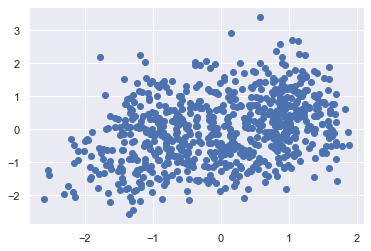

In [138]:
import matplotlib.pyplot as plt
plt_1=plt.scatter(weather_std_df.iloc[:,0], food_std_df.iloc[:,0])

In [82]:
weather.columns

Index(['평균기온', '최저기온', '최고기온', '일강수량', '평균이슬점온도', '최소상대습도', '평균상대습도', '합계일조시간',
       '합계일사량', '평균지면온도', '합계대형증발량', '합계소형증발량'],
      dtype='object')

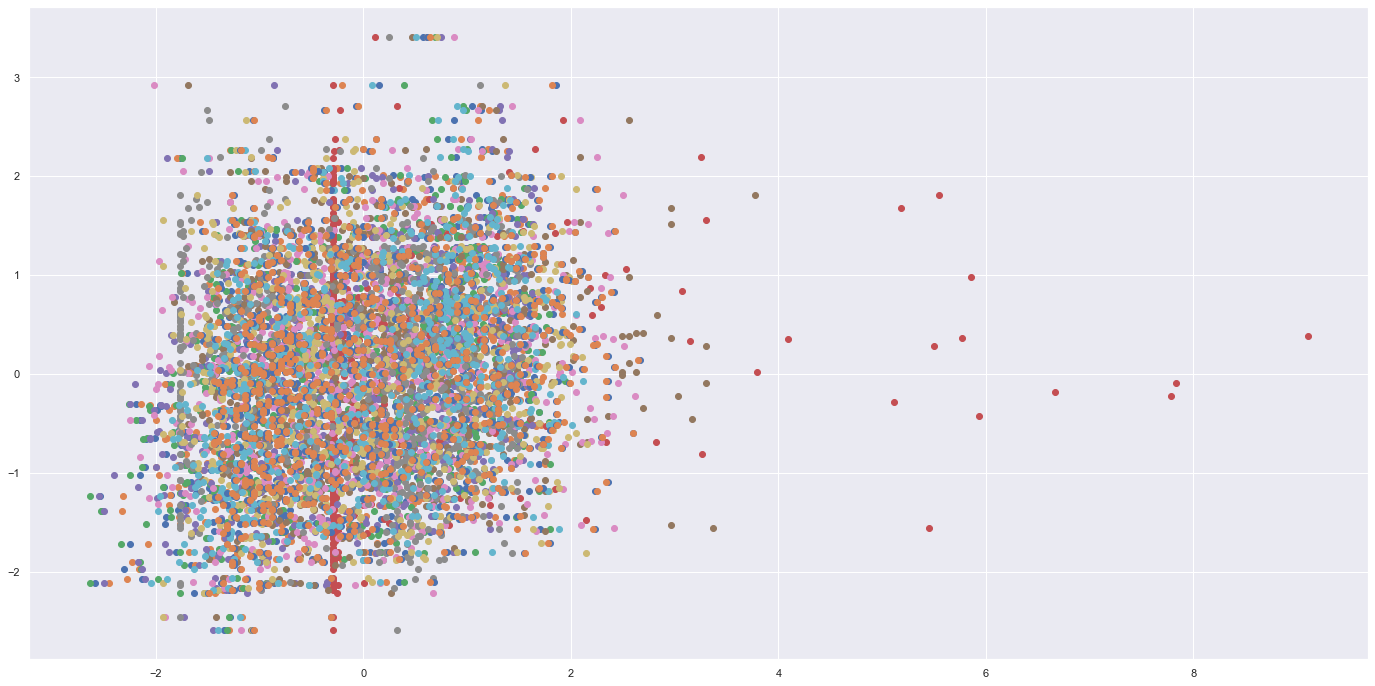

In [142]:
fig, axs = plt.subplots(figsize= (24,12), ncols =1, nrows=1 )
for i in range(12):
    globals()[f'plt_{i}'] = plt.scatter(weather_std_df.iloc[:,i], food_std_df.iloc[:,0], label = weather.columns) # food_0 : 건어물과 음식간의 관계


In [150]:
weather_std_df.corr(method = 'pearson')

,평균기온,최저기온,최고기온,일강수량,평균이슬점온도,최소상대습도,평균상대습도,합계일조시간,합계일사량,평균지면온도,합계대형증발량,합계소형증발량
평균기온,1.000000,0.989876,0.990516,0.154949,0.954816,0.430886,0.437886,0.077536,0.454863,0.981945,0.628896,0.629514
최저기온,0.989876,1.000000,0.965369,0.204903,0.969261,0.505565,0.505011,-0.007680,0.372610,0.967315,0.553277,0.553952
최고기온,0.990516,0.965369,1.000000,0.101941,0.922380,0.341349,0.363368,0.172695,0.534072,0.978538,0.693158,0.693748
일강수량,0.154949,0.204903,0.101941,1.000000,0.278573,0.527415,0.519287,-0.406694,-0.328249,0.115809,-0.262336,-0.261514
평균이슬점온도,0.954816,0.969261,0.922380,0.278573,1.000000,0.646439,0.681328,-0.115028,0.255414,0.916459,0.421507,0.422383
최소상대습도,0.430886,0.505565,0.341349,0.527415,0.646439,1.000000,0.895108,-0.604037,-0.388042,0.362533,-0.286673,-0.285982
평균상대습도,0.437886,0.505011,0.363368,0.519287,0.681328,0.895108,1.000000,-0.551730,-0.342820,0.365220,-0.256991,-0.255921
합계일조시간,0.077536,-0.007680,0.172695,-0.406694,-0.115028,-0.604037,-0.551730,1.000000,0.828267,0.167610,0.703496,0.703490
합계일사량,0.454863,0.372610,0.534072,-0.328249,0.255414,-0.388042,-0.342820,0.828267,1.000000,0.548029,0.937552,0.937854
평균지면온도,0.981945,0.967315,0.978538,0.115809,0.916459,0.362533,0.365220,0.167610,0.548029,1.000000,0.705914,0.706560


In [155]:
plt.rcParams['font.family']="Malgun Gothic"

C:\Users\ASUS\anaconda3\envs\pythonHK\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ASUS\anaconda3\envs\pythonHK\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\ASUS\anaconda3\envs\pythonHK\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)


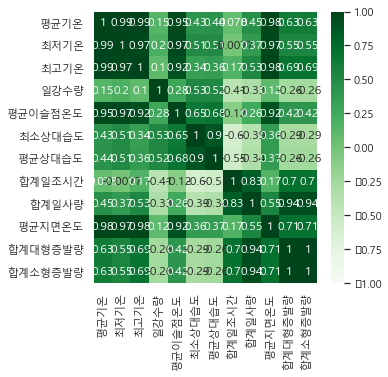

In [154]:
import seaborn as sb
plt.rcParams["figure.figsize"] = (5,5)
sb.heatmap(weather_std_df.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Greens', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )
plt.show()  